<a href="https://colab.research.google.com/github/essteer/data-science/blob/main/src/analysis/eda_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Wine Quality Dataset

This notebook applies EDA techniques to the popular wine quality dataset, which consists of two files (for red and white wine), available here:

https://archive.ics.uci.edu/dataset/186/wine+quality

## Imports and theme

In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
palette = {
    "dark": "#252b33", "grey": "#45464d",
    "light": "#fefeff", "stone": "#8f8f94",
    "blue": "#336681", "green": "#089389",
    "red": "#d34748", "pink": "#cf82d3",
    "yellow": "#e6daaa"
}
# Set plot defaults
sns.set_style(rc={"figure.facecolor": palette["dark"],
                  "axes.facecolor": palette["dark"],
                  "axes.edgecolor": palette["light"],
                  "grid.color": palette["grey"]})

# Select heatmap colours
hmap_colours = [palette["blue"], palette["light"], palette["red"]]
# Define colour boundaries and corresponding values
bounds = [0.0, 0.5, 1.0]
norm = mcolors.BoundaryNorm(bounds, len(hmap_colours))

# Create the colourmap
custom_cmap = mcolors.LinearSegmentedColormap.from_list("", list(zip(bounds, hmap_colours)))


## Load data

In [ ]:
df_white = pd.read_csv("winequality-white.csv", sep=";")
df_red = pd.read_csv("winequality-red.csv", sep=";")

In [ ]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_red.shape

(1599, 12)

## Correlation matrix

In [ ]:
correlation_matrix_red = df_red.corr()
correlation_matrix_red = correlation_matrix_red.apply(pd.to_numeric, errors="coerce")

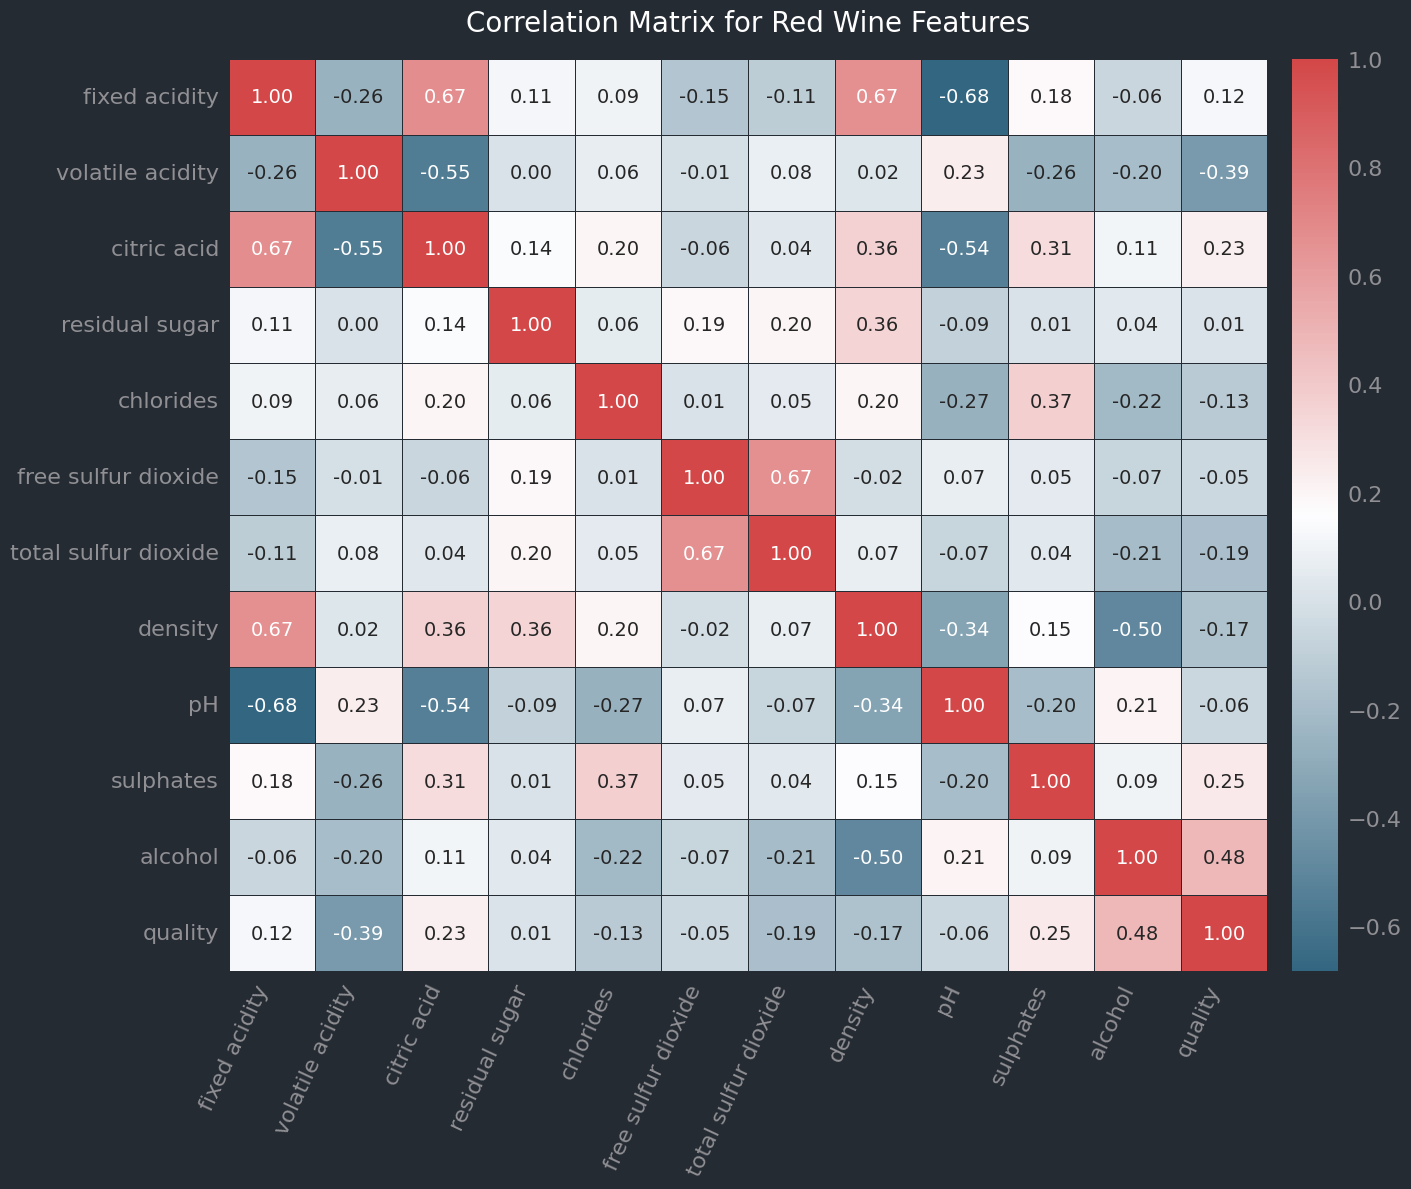

In [ ]:
# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))

hmap = sns.heatmap(correlation_matrix_red,
                   annot=True,
                   annot_kws={"size": 14},
                   fmt=".2f",
                   linewidth=0.5,
                   cmap=custom_cmap,
                   linecolor=palette["dark"],
                   cbar_kws={"pad": 0.02}
)

# Remove ticks from x and y axes (left and bottom)
hmap.tick_params(left=False, bottom=False)
# Remove ticks from cbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)

# Set descriptors
hmap.set_title("Correlation Matrix for Red Wine Features",
               fontdict={"size": 20, "color": palette["light"]},
               pad=20)
plt.xticks(fontsize=16, color=palette["stone"], rotation=65, ha="right")
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
cbar.ax.tick_params(labelsize=16, labelcolor=palette["stone"])

plt.tight_layout()
plt.show()

### Correlations between red wine features and quality

First, we can explore simple correlations between the different features of the 1,599 red wines in the dataset, which is derived from vinho verde wines (from the Minho region of Portugal), as examined by the original authors of the study "Modeling wine preferences by data mining from physicochemical properties".

The above heatmap displays strong positive correlations in red (warm), and strong negative correlations in blue (cold).

The strongest positive correlation is that between the alcohol level and the quality. At 0.48, alcohol exhibits a moderate influence on the perceived quality of the wines. This makes intuitive sense, since the taste and effects of alcohol constitute a key factor in consumers' enjoyment of wine products, though only up to a point - when alcohol levels are too high, the other flavous of the wine will be overwhelmed.

Conversely, excessive volatile acidity can result in off-flavors, such as a vinegary or sharp taste. Volatile acidity exihibits the strongest negative correlation with quality, though at -0.39 it is again only a moderate correlation.

pH can influence the taste and feel of the wine. Wines with lower pH values (higher acidity) might taste crisper, while those with higher pH values might taste softer and rounder. Since lower pH values correspond to higher acidity, it is unsurprising that we see a strong negative correlation between the pH levels of the wines and both the fixed acidity and citric acid levels.

Note also that citric acid is a type of fixed acid found in grapes and added during the process of winemaking; this explains the relatively strong positive correlation between fixed acidity and citric acid.

The moderate negative correlation between citric acid and volatile acidity, on the other hand, suggests that the presence of citric acid may tend to offset the level of volatile acidity in the wine.

In general, it can be seen that the relationship between quality and the other 11 variables is complex, with no clear determining relationship between the majority of the variables considered here. This is perhaps good news for (skilled) winemakers, since it implies that competitors cannot simply replicate the levels of various chemicals contained within their wines to achieve the same level of perceived quality.

This notwithstanding, even though several of the variables exhibit only weak correlations with wine quality, producers may still benefit from this knowledge, since the cumulative effect of several minor improvements may lead to a larger overall improvement in the quality of the wine.

Next, we examine a similar heatmap for the 4,898 white wines contained in the dataset.

In [ ]:
correlation_matrix_white = df_white.corr()
correlation_matrix_white = correlation_matrix_white.apply(pd.to_numeric, errors="coerce")

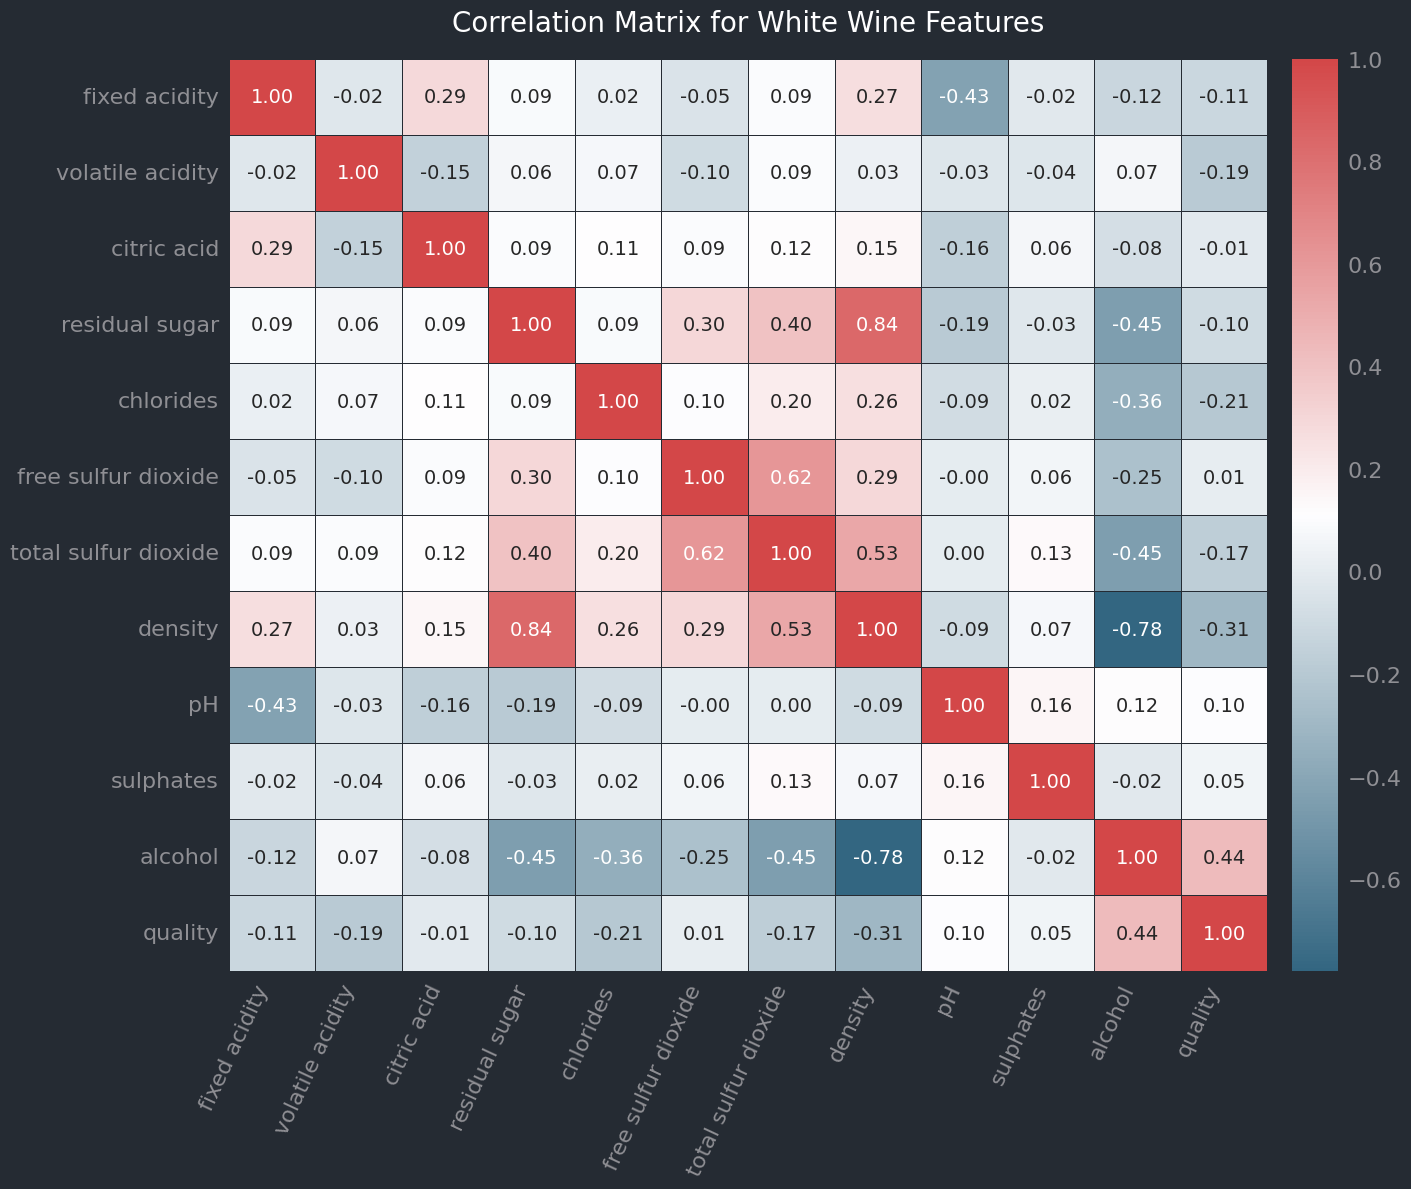

In [ ]:
# Set up matplotlib figure
fig, ax = plt.subplots(figsize=(15, 12))

hmap = sns.heatmap(correlation_matrix_white,
                   annot=True,
                   annot_kws={"size": 14},
                   fmt=".2f",
                   linewidth=0.5,
                   cmap=custom_cmap,
                   linecolor=palette["dark"],
                   cbar_kws={"pad": 0.02}
)

# Remove ticks from x and y axes (left and bottom)
hmap.tick_params(left=False, bottom=False)
# Remove ticks from cbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(right=False)

# Set descriptors
hmap.set_title("Correlation Matrix for White Wine Features",
               fontdict={"size": 20, "color": palette["light"]},
               pad=20)
plt.xticks(fontsize=16, color=palette["stone"], rotation=65, ha="right")
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
cbar.ax.tick_params(labelsize=16, labelcolor=palette["stone"])

plt.tight_layout()
plt.show()

### Correlations between white wine features and quality

The above heatmap displays correlations between variables for the 4,898 white wines in the dataset, with strong positive correlations in red (warm), and strong negative correlations in blue (cold).

Alcohol retains the strongest positive correlation with quality, though at a marginally reduced level of 0.44 compared with 0.48 for red wine. This suggests that an increase in alcohol levels in red wines is associated with a marginally higher perceived quality than in white wines, all other variables being equal.

Notably, the general trend for the variable correlations with quality is weaker compared with the same metrics for red wines. There are exceptions, however, such as the stronger negative correlations between alcohol levels and residual sugar, chlorides, sulfur dioxides, and density, which exhibit moderate negative correlations with alcohol, and a strong negative correlation between density and alcohol.

Similarly, density exhibits a stronger correlation with alcohol and residual sugar levels for white wines than red wines. In the case of red wines, density was associated with a 0.36 positive correlation with residual sugar, and -0.5 negative correlation with alcohol. For white wines, we see a 0.84 correlation with residual sugar, and -0.78 correlation with alcohol.

## Understand the data

The minimum, maximum, and mean values for each of the variables in the red and white wine datasets are displayed below.

In [ ]:
# Get data descriptions for red and white wines
desc_red = df_red.describe().T
desc_red = desc_red.loc[:, ["min", "max", "mean", "std"]]
desc_white = df_white.describe().T
desc_white = desc_white.loc[:, ["min", "max", "mean", "std"]]
# Combine descriptions and set higher-level column headings
combined_desc = pd.concat([desc_red, desc_white], keys=["Red", "White"], axis=1).round(2)
print(combined_desc)

                       Red                       White                       
                       min     max   mean    std   min     max    mean    std
fixed acidity         4.60   15.90   8.32   1.74  3.80   14.20    6.85   0.84
volatile acidity      0.12    1.58   0.53   0.18  0.08    1.10    0.28   0.10
citric acid           0.00    1.00   0.27   0.19  0.00    1.66    0.33   0.12
residual sugar        0.90   15.50   2.54   1.41  0.60   65.80    6.39   5.07
chlorides             0.01    0.61   0.09   0.05  0.01    0.35    0.05   0.02
free sulfur dioxide   1.00   72.00  15.87  10.46  2.00  289.00   35.31  17.01
total sulfur dioxide  6.00  289.00  46.47  32.90  9.00  440.00  138.36  42.50
density               0.99    1.00   1.00   0.00  0.99    1.04    0.99   0.00
pH                    2.74    4.01   3.31   0.15  2.72    3.82    3.19   0.15
sulphates             0.33    2.00   0.66   0.17  0.22    1.08    0.49   0.11
alcohol               8.40   14.90  10.42   1.07  8.00   14.20  

The figures above describe the minimum, maximum, and mean values for each of the 12 variables, for the red and white wine datasets, respectively. Note once more that the 1,599 red wines and 4,898 white wines concerned are vinho verde wines, from the northwest of Portugal.

Regarding the quality of the wines, note that the two categories exihibit similar means and standard deviations (at mu=5.64 std=0.81, and mu=5.88 std=0.89, respectively). Furthermore, these figures suggest that the majority of the wines are of average quality, centred at only slightly above the halfway point in terms of quality.

The two classes also exhibited similar alcohol contents, with means and standard deviations of 10.42 and 1.07 for red wines, and 10.51 and 1.23 for white wines suggesting a marginally higher average alcohol level for the white wines in the sample.

The figures for residual sugars in the white wines suggests the presence of extreme outliers: the maximum value of 65.80 compared with the mean of 6.39 and standard deviation of 5.07, places the maximum 11.72 standard deviations above the mean ((65.8-6.39)/5.07 = 11.72).

Similarly, the figures for chlorides, free sulfur dioxide, and total dioxide for both red and white wine classes suggest significant outliers at the upper ends of their ranges.

The distributions below depict some of the trends exhibited across the red and white wine classes.



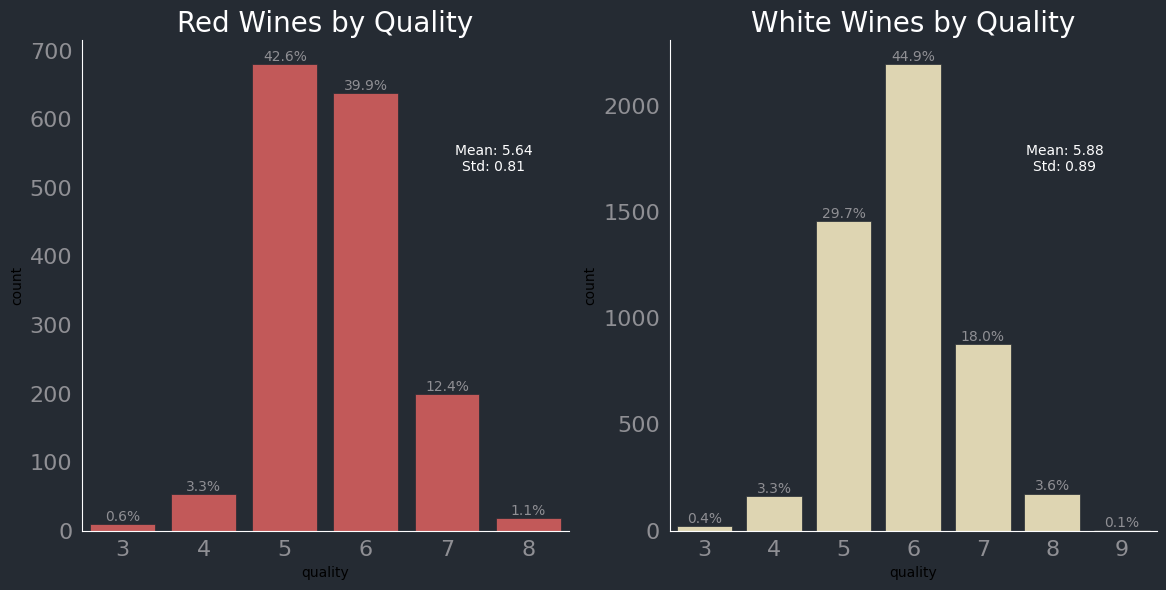

In [ ]:
combined_df = pd.concat([df_red, df_white], keys=["Red", "White"], axis=0)

# Plot side by side for quality
plt.figure(figsize=(12, 6))

# Bar chart for red wines
ax1 = plt.subplot(1, 2, 1)
sns.countplot(data=combined_df[combined_df.index.get_level_values(0) == "Red"],
              x="quality",
              ec=palette["dark"],
              color=palette["red"],
              linewidth=0.5)

plt.title("Red Wines by Quality", fontdict={"size": 20, "color": palette["light"]})
plt.xticks(fontsize=16, color=palette["stone"])
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
# Remove ticks from x and y axes (left and bottom)
plt.tick_params(left=False, bottom=False)
# Remove top and right axes
sns.despine()

# Get mean and standard deviation for red wines
red_mean = combined_df[combined_df.index.get_level_values(0) == "Red"]["quality"].mean()
red_std = combined_df[combined_df.index.get_level_values(0) == "Red"]["quality"].std()
# Add to textbox
ax1.text(0.25, 0.215, f"Mean: {red_mean:.2f}\nStd: {red_std:.2f}", color=palette["light"], ha="center", transform=ax.transAxes)

total_red_wines = len(combined_df[combined_df.index.get_level_values(0) == "Red"])
for bar in ax1.patches:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2,
             height + 0.2, f"{height / total_red_wines:.1%}",
             ha="center",
             va="bottom",
             color=palette["stone"])

# Bar chart for white wines
ax2 = plt.subplot(1, 2, 2)
sns.countplot(data=combined_df[combined_df.index.get_level_values(0) == "White"],
              x="quality",
              ec=palette["dark"],
              color=palette["yellow"],
              linewidth=0.5)

plt.title("White Wines by Quality", fontdict={"size": 20, "color": palette["light"]})
plt.xticks(fontsize=16, color=palette["stone"])
plt.yticks(fontsize=16, color=palette["stone"], rotation=0)
# Remove ticks from x and y axes (left and bottom)
plt.tick_params(left=False, bottom=False)
# Remove top and right axes
sns.despine()

# Get mean and standard deviation for white wines
white_mean = combined_df[combined_df.index.get_level_values(0) == "White"]["quality"].mean()
white_std = combined_df[combined_df.index.get_level_values(0) == "White"]["quality"].std()
# Add to textbox
ax2.text(0.8, 0.215, f"Mean: {white_mean:.2f}\nStd: {white_std:.2f}", color=palette["light"], ha="center", transform=ax.transAxes)

total_white_wines = len(combined_df[combined_df.index.get_level_values(0) == "White"])
for bar in ax2.patches:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2,
             height + 0.2, f"{height / total_white_wines:.1%}",
             ha="center",
             va="bottom",
             color=palette["stone"])

plt.tight_layout()
plt.show()

The means and standard deviations of the red wine and white wine classes appear similar in numerical terms, but when depicted visually as in the above bar charts, we can observe a significant difference between the two classes.

The two classes yield a similar probability of selecting a poor wine at random (rated 3 or 4 in quality), of 3.9% for red wines and 3.7% for white wines.

A random selection of a white wine would have almost a 2/3 chance (66.6%) of being drawn from the upper half of the quality range, from 6 and above. In the case of red wines, this probability is much closer to 1/2, at 53.4%.

In the case of higher quality wines, the difference is even more apparent: 21.7% of white wines are rated as being of quality of 7 or higher; just 13.5% of red wines fall onto the same category.

### Acidity levels

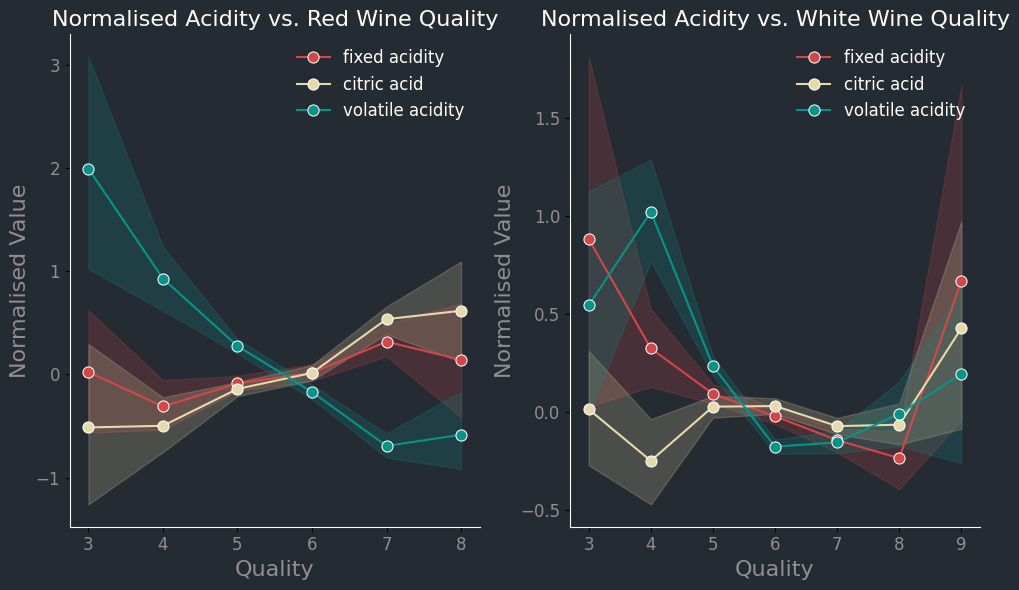

In [ ]:
# Extract relevant columns
selected_columns = ["fixed acidity", "volatile acidity", "citric acid", "quality"]

df_acid_red = df_red[selected_columns].copy()
df_acid_white = df_white[selected_columns].copy()

# Normalise the variables (excluding quality)
for column in selected_columns[:-1]:
    # Red wines
    mean = df_acid_red[column].mean()
    std = df_acid_red[column].std()
    df_acid_red[column] = (df_acid_red[column] - mean) / std
    # White wines
    mean = df_acid_white[column].mean()
    std = df_acid_white[column].std()
    df_acid_white[column] = (df_acid_white[column] - mean) / std

# Create line plot for normalised variables against quality
plt.figure(figsize=(10, 6))

# Line plot for red wines
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data=df_acid_red, x="quality", y="fixed acidity", label="fixed acidity", marker="o", markersize=8, color=palette["red"])
sns.lineplot(data=df_acid_red, x="quality", y="citric acid", label="citric acid", marker="o", markersize=8, color=palette["yellow"])
sns.lineplot(data=df_acid_red, x="quality", y="volatile acidity", label="volatile acidity", marker="o", markersize=8, color=palette["green"])

# Set plot title and labels
plt.title("Normalised Acidity vs. Red Wine Quality", fontdict={"size": 16, "color": palette["light"]})
plt.xlabel("Quality", fontsize=16, color=palette["stone"])
plt.ylabel("Normalised Value", fontsize=16, color=palette["stone"])
plt.xticks(fontsize=12, color=palette["stone"])
plt.yticks(fontsize=12, color=palette["stone"])
plt.legend(fontsize=12, labelcolor=palette["light"], frameon=False)
sns.despine()

# Line plot for white wines
ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data=df_acid_white, x="quality", y="fixed acidity", label="fixed acidity", marker="o", markersize=8, color=palette["red"])
sns.lineplot(data=df_acid_white, x="quality", y="citric acid", label="citric acid", marker="o", markersize=8, color=palette["yellow"])
sns.lineplot(data=df_acid_white, x="quality", y="volatile acidity", label="volatile acidity", marker="o", markersize=8, color=palette["green"])

# Set plot title and labels
plt.title("Normalised Acidity vs. White Wine Quality", fontdict={"size": 16, "color": palette["light"]})
plt.xlabel("Quality", fontsize=16, color=palette["stone"])
plt.ylabel("Normalised Value", fontsize=16, color=palette["stone"])
plt.xticks(fontsize=12, color=palette["stone"])
plt.yticks(fontsize=12, color=palette["stone"])
plt.legend(fontsize=12, labelcolor=palette["light"], frameon=False)
sns.despine()

plt.tight_layout()
plt.show()


Now returning to the physicochemical properties of the wines, the above line plots depict the relationship between acidity and quality. We can observe a clear trend across red and white wines, that volatile acidity is associated with low-quality wines, and the level of volatile acidity is reduced as the quality rises. This matches with our observation from the correlation matrices depicted earlier.

For red wines, fixed acid and citric acid exhibit a mild positive correlation with quality, which again matches our earlier observation. The same can be said of citric acid found in white wines, but in the case of fixed acid in white wines, the data actually depicts a parabola - suggesting that higher levels of fixed acid is associated with both extremes of the quality scale.

It is notable for both charts that the variance narrows considerably around the mean quality wines.

In light of our earlier bar chart showing the percentage of red and white wines in each quality category, we should note the likelihood that the higher variance at the lower and upper ends of teh quality scale is a factor of the much smaller number of samples that fall into those value ranges.

### Other chemicals

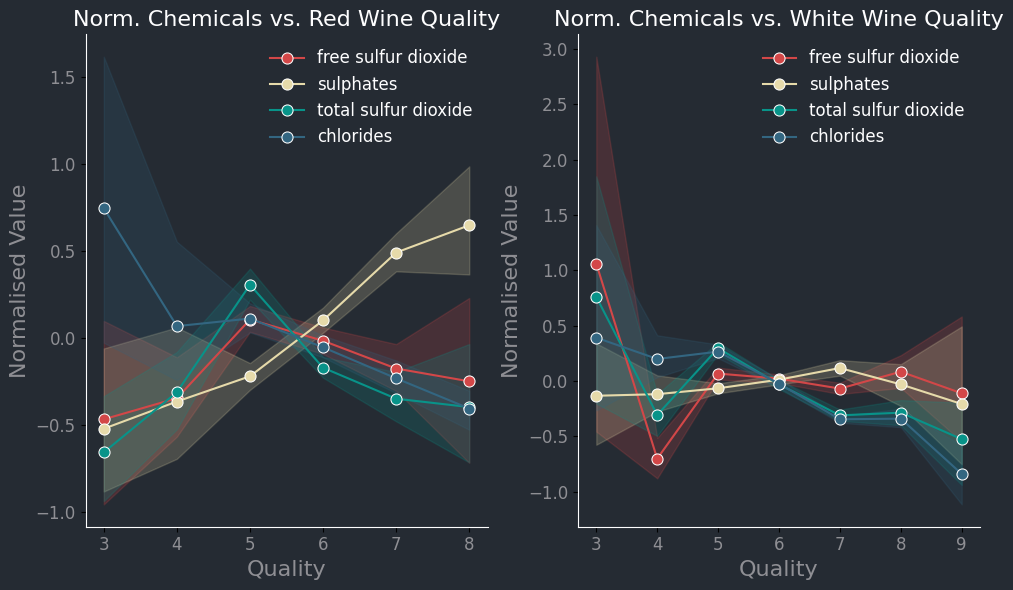

In [ ]:
# Extract relevant columns
selected_columns = ["free sulfur dioxide", "total sulfur dioxide", "sulphates", "chlorides", "quality"]

df_acid_red = df_red[selected_columns].copy()
df_acid_white = df_white[selected_columns].copy()

# Normalise the variables (excluding quality)
for column in selected_columns[:-1]:
    # Red wines
    mean = df_acid_red[column].mean()
    std = df_acid_red[column].std()
    df_acid_red[column] = (df_acid_red[column] - mean) / std
    # White wines
    mean = df_acid_white[column].mean()
    std = df_acid_white[column].std()
    df_acid_white[column] = (df_acid_white[column] - mean) / std

# Create line plot for normalised variables against quality
plt.figure(figsize=(10, 6))

# Line plot for red wines
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(data=df_acid_red, x="quality", y="free sulfur dioxide", label="free sulfur dioxide", marker="o", markersize=8, color=palette["red"])
sns.lineplot(data=df_acid_red, x="quality", y="sulphates", label="sulphates", marker="o", markersize=8, color=palette["yellow"])
sns.lineplot(data=df_acid_red, x="quality", y="total sulfur dioxide", label="total sulfur dioxide", marker="o", markersize=8, color=palette["green"])
sns.lineplot(data=df_acid_red, x="quality", y="chlorides", label="chlorides", marker="o", markersize=8, color=palette["blue"])

# Set plot title and labels
plt.title("Norm. Chemicals vs. Red Wine Quality", fontdict={"size": 16, "color": palette["light"]})
plt.xlabel("Quality", fontsize=16, color=palette["stone"])
plt.ylabel("Normalised Value", fontsize=16, color=palette["stone"])
plt.xticks(fontsize=12, color=palette["stone"])
plt.yticks(fontsize=12, color=palette["stone"])
plt.legend(fontsize=12, labelcolor=palette["light"], frameon=False)
sns.despine()

# Line plot for white wines
ax2 = plt.subplot(1, 2, 2)
sns.lineplot(data=df_acid_white, x="quality", y="free sulfur dioxide", label="free sulfur dioxide", marker="o", markersize=8, color=palette["red"])
sns.lineplot(data=df_acid_white, x="quality", y="sulphates", label="sulphates", marker="o", markersize=8, color=palette["yellow"])
sns.lineplot(data=df_acid_white, x="quality", y="total sulfur dioxide", label="total sulfur dioxide", marker="o", markersize=8, color=palette["green"])
sns.lineplot(data=df_acid_white, x="quality", y="chlorides", label="chlorides", marker="o", markersize=8, color=palette["blue"])

# Set plot title and labels
plt.title("Norm. Chemicals vs. White Wine Quality", fontdict={"size": 16, "color": palette["light"]})
plt.xlabel("Quality", fontsize=16, color=palette["stone"])
plt.ylabel("Normalised Value", fontsize=16, color=palette["stone"])
plt.xticks(fontsize=12, color=palette["stone"])
plt.yticks(fontsize=12, color=palette["stone"])
plt.legend(fontsize=12, labelcolor=palette["light"], frameon=False)
sns.despine()

plt.tight_layout()
plt.show()

The relationships between free sulfur dioxide, total sulfur dioxide, sulphates, and chlorides to the quality of red and white wines were identified to be weak in our earlier correlation matrices.

The above line plots show relatively flat relationships between these variables and the wine quality. A notable exception is the clear positive linear relationship between sulphates and red wine quality, which is not repeated in the white wine population.

Recall that the correlations between red wine quality and sulphates is 0.25, versus just 0.05 for white wines. 0.25 is a weak correlation, but still appears significant relative to that of the other chemicals examined.